In [45]:
import numpy as np
import numpy.linalg as npl
from numpy.fft import fft,ifft
import matplotlib.pyplot as plt

In [149]:
def our_fft(x):
    N=len(x)
    if N==1:
        return x
    
    N_half = int(N/2)
    f_even = our_fft(x[0:N:2])
    f_odd = our_fft(x[1:N:2])
    f=np.zeros(N).astype('complex')
    for ix in range(N_half):
        om=np.exp(-1j*2*np.pi*ix/N)
        f[ix] = f_even[ix]+om*f_odd[ix]
        f[ix+N_half] = f_even[ix]-om*f_odd[ix]
    return f

N=32
x=np.random.randn(N)
print('Error btwn ours vs truth:',npl.norm(fft(x)-our_fft(x)))

Error btwn ours vs truth: 5.846354753949606e-15


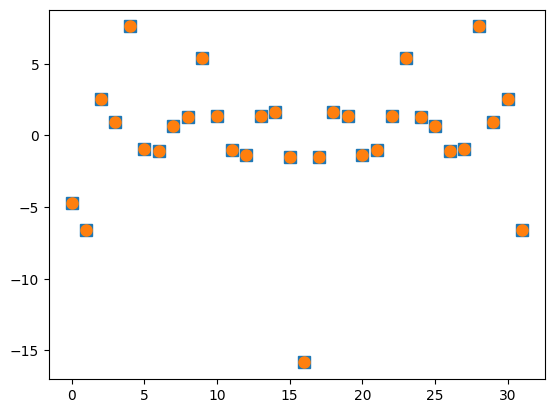

In [130]:
plt.plot(fft(x),'s',markersize=9)
plt.plot(our_fft(x),'o',markersize=8)

In [159]:
def our_ifft(x):
    N=len(x)
    if N==1:
        return x
    
    N_half = int(N/2)
    f_even = our_ifft(x[0:N:2])
    f_odd = our_ifft(x[1:N:2])
    f=np.zeros(N).astype('complex')
    for ix in range(N_half):
        om=np.exp(1j*2*np.pi*ix/N)
        f[ix] = f_even[ix]+om*f_odd[ix]
        f[ix+N_half] = f_even[ix]-om*f_odd[ix]
    return f

N=32
x=np.random.randn(N)
print('Error btwn ours vs truth:',npl.norm(x-our_ifft(our_fft(x))/N))

Error btwn ours vs truth: 1.0654760312050655e-15
